# Housing Price Prediction Case Study

## Multiple Linear Regression

### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Data
Use housing dataset.

## Reading and Understanding the Data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [4]:
# Check the head of the dataset
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

## Data Inspection

In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing['price'].mean()

4766729.247706422

In [8]:
housing['price'].median()

4340000.0

In [9]:
housing['price'].mode()

0    3500000
1    4200000
Name: price, dtype: int64

In [10]:
housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

## Data Cleaning

In [11]:
# Checking Null values
housing.isnull().sum()#*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

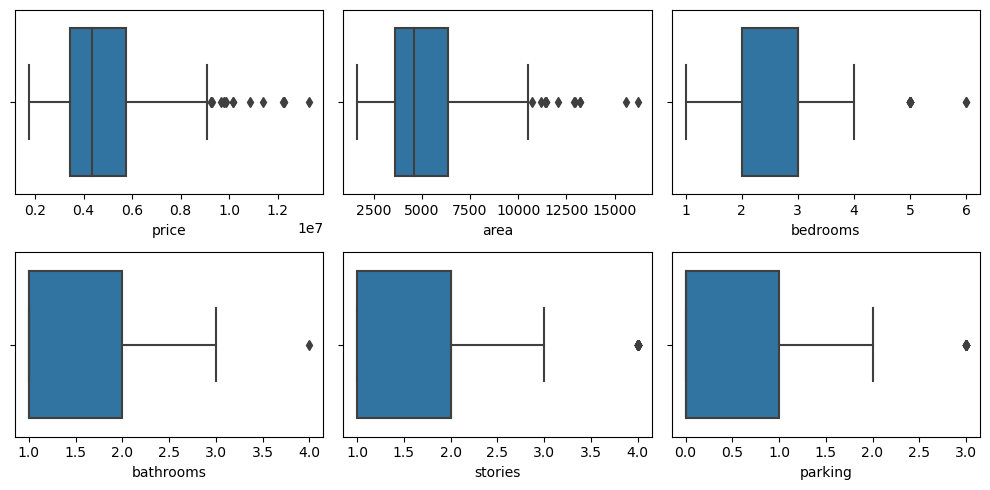

In [26]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [27]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

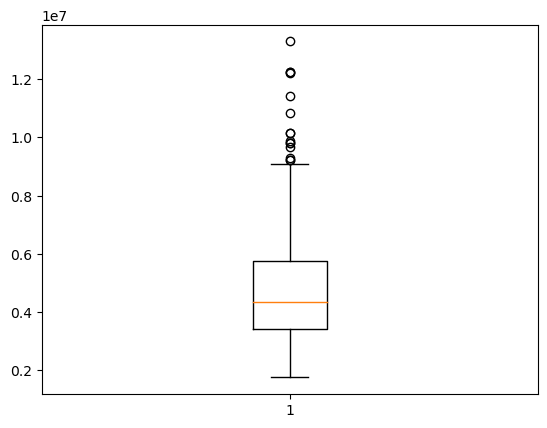

In [12]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

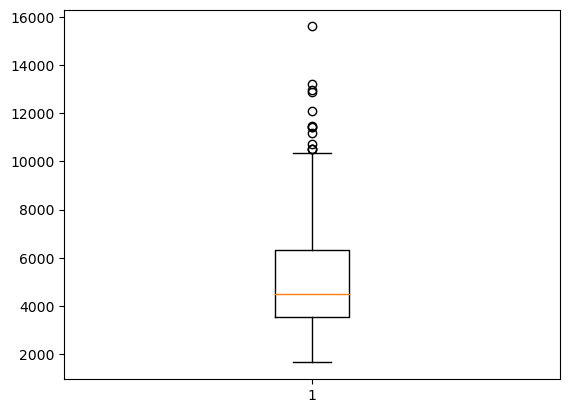

In [13]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

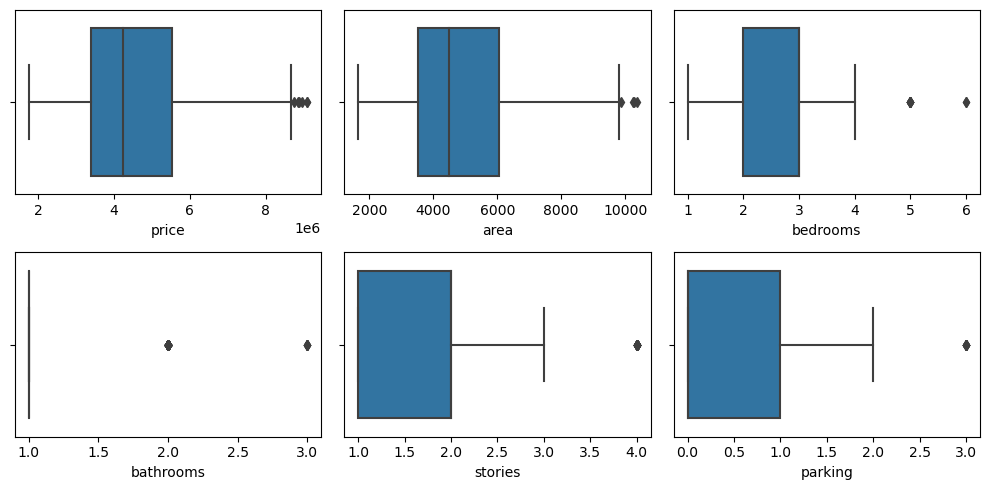

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

## Exploratory Data Analytics

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

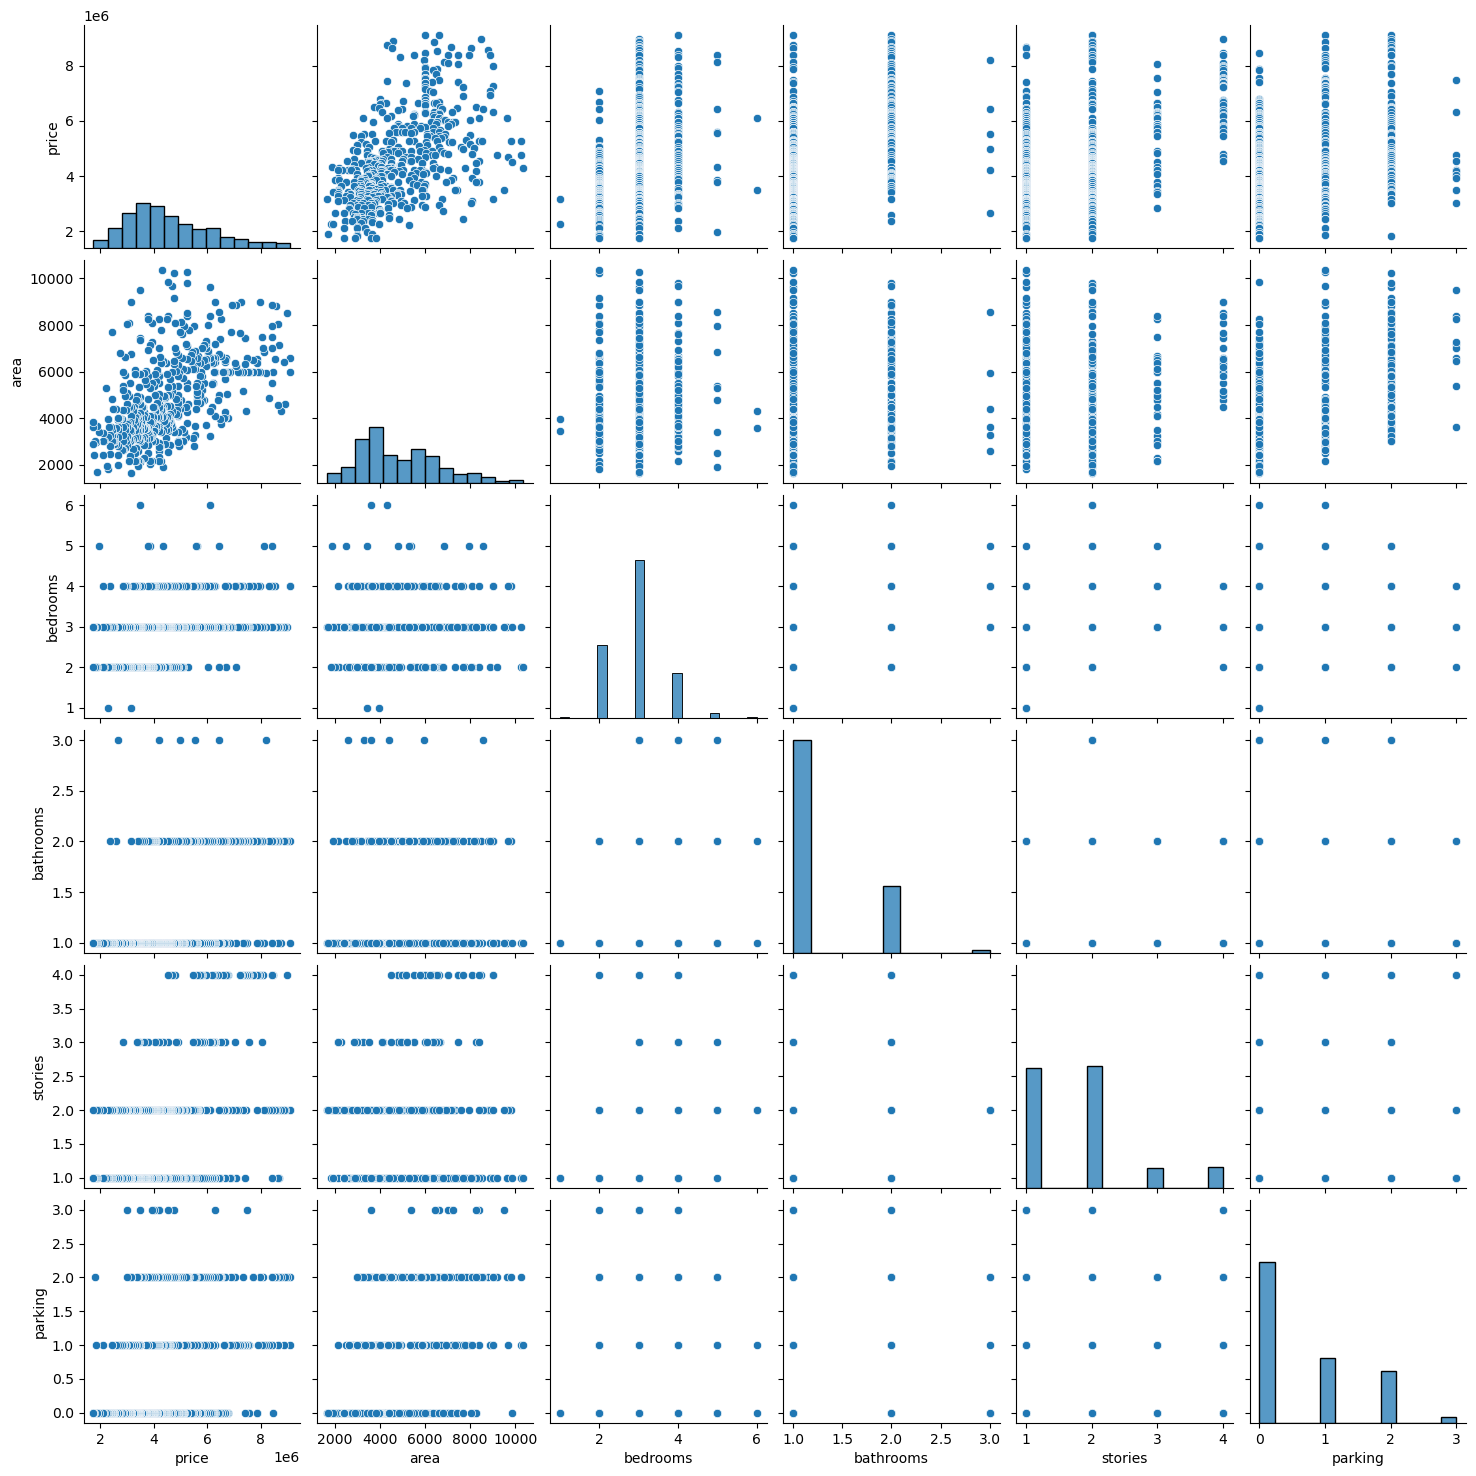

In [15]:
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

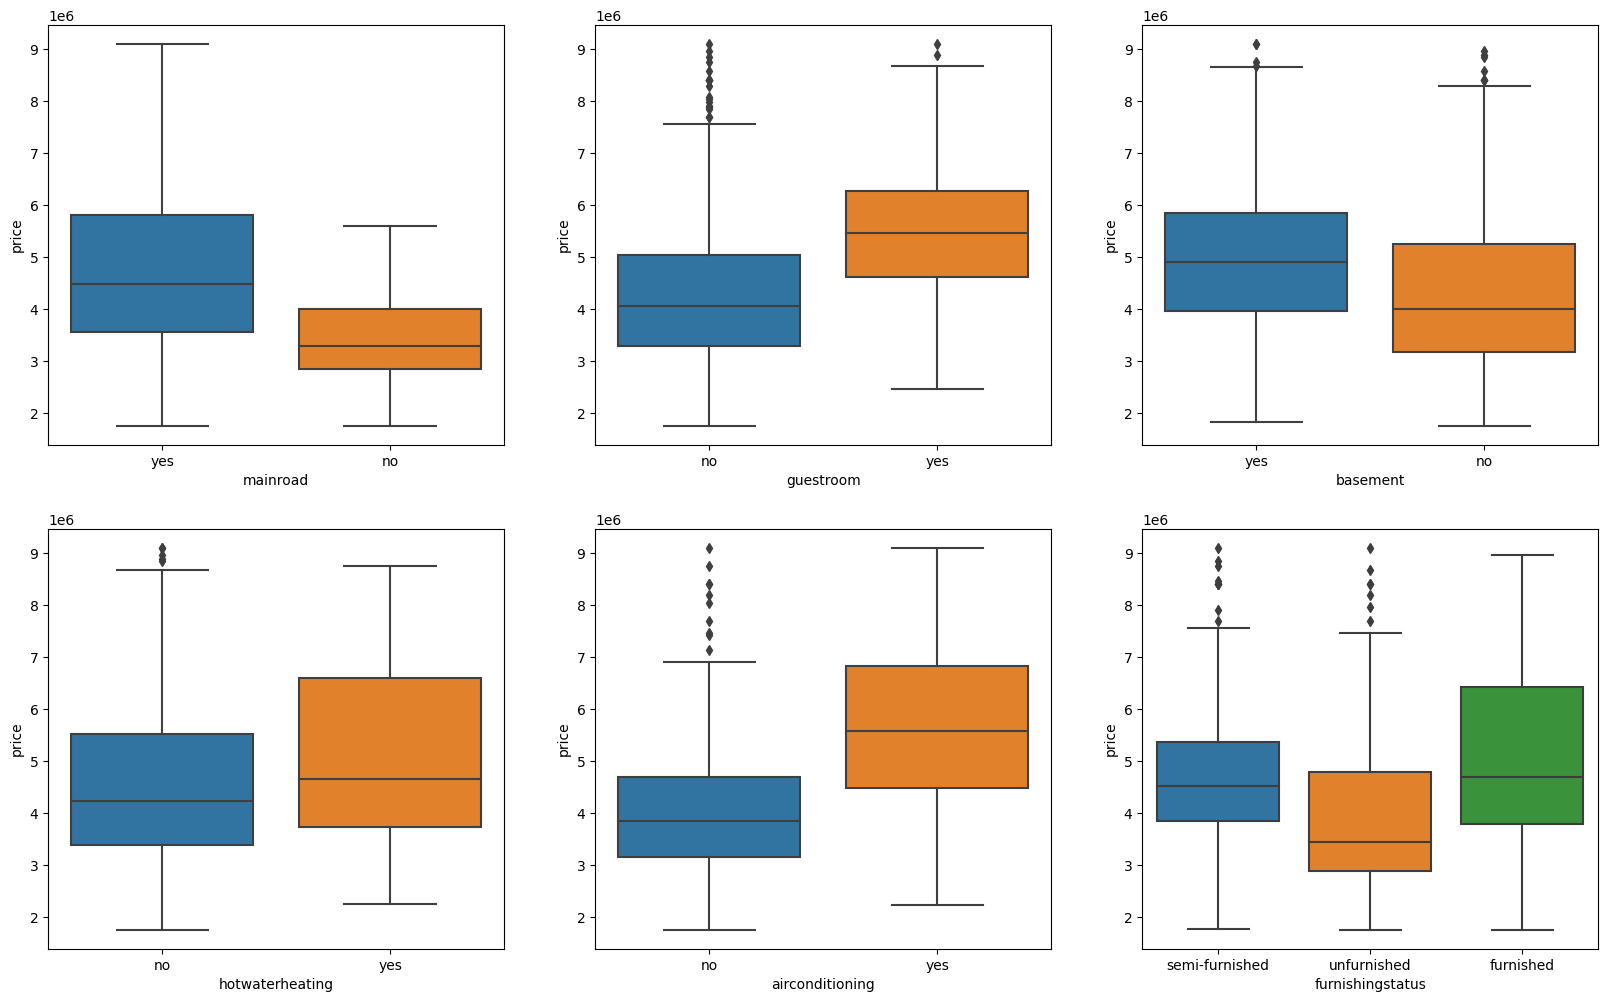

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

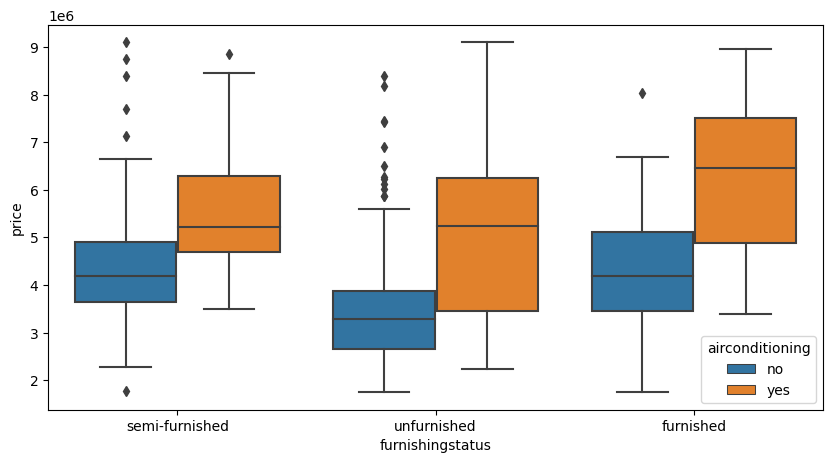

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

## Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [18]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [19]:
# Check the housing dataframe now

housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

   furnishingstatus  
15   semi-furnished  
16      unfurnished  
17        furnished  
18        furnished  
19   semi-furnished

### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [20]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [21]:
# Check what the dataset 'status' looks like
status.head()

furnished  semi-furnished  unfurnished
15          0               1            0
16          0               0            1
17          1               0            0
18          1               0            0
19          0               1            0

Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [22]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [23]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [24]:
# Now let's see the head of our dataframe.

housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

   furnishingstatus  semi-furnished  unfurnished  
15   semi-furnished               1            0  
16      unfurnished               0            1  
17        furnished               0            0  
18        furnished               0            0  
19   semi-furnished               1            0

In [25]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [26]:
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    semi-furnished  unfurnished  
15               1            0  
16               0            1  
17               0            0  
18               0            0  
19               1            0

In [27]:
housing.corr()

price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.533186  0.335328   0.466483  0.446839  0.307185   
area             0.533186  1.000000  0.127745   0.171528  0.109877  0.302116   
bedrooms         0.335328  0.127745  1.000000   0.346230  0.406684 -0.025775   
bathrooms        0.466483  0.171528  0.346230   1.000000  0.311314  0.024614   
stories          0.446839  0.109877  0.406684   0.311314  1.000000  0.120759   
mainroad         0.307185  0.302116 -0.025775   0.024614  0.120759  1.000000   
guestroom        0.303994  0.213826  0.078443   0.152035  0.034301  0.095201   
basement         0.190117  0.042227  0.102261   0.124691 -0.166031  0.041789   
hotwaterheating  0.075979 -0.020489  0.042953   0.046486  0.027834 -0.019471   
airconditioning  0.471706  0.264680  0.150378   0.175634  0.293854  0.102198   
parking          0.321058  0.357276  0.105561   0.127102  0.022043  0.195635   
prefarea         0.280808  0.208014  0.061014   0.027817  0.021529  0.193613   
semi-furnished   0.085766  0.010588  0.056241   0.024132 -0.004171  0.011257   
unfurnished     -0.278463 -0.121219 -0.122155  -0.129211 -0.085689 -0.125560   

                 guestroom  basement  hotwaterheating  airconditioning  \
price             0.303994  0.190117         0.075979         0.471706   
area              0.213826  0.042227        -0.020489         0.264680   
bedrooms          0.078443  0.102261         0.042953         0.150378   
bathrooms         0.152035  0.124691         0.046486         0.175634   
stories           0.034301 -0.166031         0.027834         0.293854   
mainroad          0.095201  0.041789        -0.019471         0.102198   
guestroom         1.000000  0.373599        -0.022922         0.139242   
basement          0.373599  1.000000        -0.012428         0.034796   
hotwaterheating  -0.022922 -0.012428         1.000000        -0.119731   
airconditioning   0.139242  0.034796        -0.119731         1.000000   
parking           0.041133  0.038480         0.052510         0.129590   
prefarea          0.184999  0.229180        -0.041079         0.087044   
semi-furnished    0.007601  0.054119         0.074875        -0.043557   
unfurnished      -0.108383 -0.108168        -0.049550        -0.086983   

                  parking  prefarea  semi-furnished  unfurnished  
price            0.321058  0.280808        0.085766    -0.278463  
area             0.357276  0.208014        0.010588    -0.121219  
bedrooms         0.105561  0.061014        0.056241    -0.122155  
bathrooms        0.127102  0.027817        0.024132    -0.129211  
stories          0.022043  0.021529       -0.004171    -0.085689  
mainroad         0.195635  0.193613        0.011257    -0.125560  
guestroom        0.041133  0.184999        0.007601    -0.108383  
basement         0.038480  0.229180        0.054119    -0.108168  
hotwaterheating  0.052510 -0.041079        0.074875    -0.049550  
airconditioning  0.129590  0.087044       -0.043557    -0.086983  
parking          1.000000  0.054487        0.048622    -0.137828  
prefarea         0.054487  1.000000       -0.015018    -0.058652  
semi-furnished   0.048622 -0.015018        1.000000    -0.603562  
unfurnished     -0.137828 -0.058652       -0.603562     1.000000

In [28]:
housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.170000e+02    517.000000  517.000000  517.000000  517.000000   
mean   4.568873e+06   4890.108317    2.941973    1.261122    1.794971   
std    1.594826e+06   1779.173101    0.731701    0.465368    0.865205   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.395000e+06   3520.000000    2.000000    1.000000    1.000000   
50%    4.235000e+06   4500.000000    3.000000    1.000000    2.000000   
75%    5.530000e+06   6050.000000    3.000000    1.000000    2.000000   
max    9.100000e+06  10360.000000    6.000000    3.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  517.000000  517.000000  517.000000       517.000000       517.000000   
mean     0.851064    0.177950    0.346228         0.042553         0.307544   
std      0.356370    0.382841    0.476228         0.202043         0.461923   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  semi-furnished  unfurnished  
count  517.000000  517.000000      517.000000   517.000000  
mean     0.653772    0.216634        0.415861     0.338491  
std      0.843380    0.412350        0.493347     0.473655  
min      0.000000    0.000000        0.000000     0.000000  
25%      0.000000    0.000000        0.000000     0.000000  
50%      0.000000    0.000000        0.000000     0.000000  
75%      1.000000    0.000000        1.000000     1.000000  
max      3.000000    1.000000        1.000000     1.000000

### Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
148  0.523810  0.526907       0.4        0.0  0.666667         1          0   
236  0.390476  0.114134       0.2        0.0  0.333333         1          1   
356  0.275238  0.072738       0.8        0.5  0.000000         0          0   
425  0.219048  0.151390       0.2        0.0  0.000000         1          0   
516  0.095238  0.157895       0.2        0.0  0.000000         0          1   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
148         0                0                0  0.000000         1   
236         1                0                0  0.000000         1   
356         1                0                1  0.333333         0   
425         1                0                0  0.666667         0   
516         0                0                0  0.333333         0   

     semi-furnished  unfurnished  
148               1            0  
236               1            0  
356               0            0  
425               0            0  
516               0            1

In [36]:
df_train.describe()

price        area    bedrooms   bathrooms     stories    mainroad  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean     0.383701    0.350081    0.390582    0.127424    0.268698    0.875346   
std      0.209712    0.207184    0.149146    0.224465    0.287833    0.330784   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.237143    0.189829    0.200000    0.000000    0.000000    1.000000   
50%      0.338095    0.295092    0.400000    0.000000    0.333333    1.000000   
75%      0.514286    0.491425    0.400000    0.000000    0.333333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  361.000000  361.000000       361.000000       361.000000  361.000000   
mean     0.168975    0.349030         0.038781         0.313019    0.218837   
std      0.375250    0.477325         0.193341         0.464366    0.287286   
min      0.000000    0.000000         0.000000         0.000000    0.000000   
25%      0.000000    0.000000         0.000000         0.000000    0.000000   
50%      0.000000    0.000000         0.000000         0.000000    0.000000   
75%      0.000000    1.000000         0.000000         1.000000    0.333333   
max      1.000000    1.000000         1.000000         1.000000    1.000000   

         prefarea  semi-furnished  unfurnished  
count  361.000000      361.000000   361.000000  
mean     0.207756        0.476454     0.304709  
std      0.406264        0.500138     0.460923  
min      0.000000        0.000000     0.000000  
25%      0.000000        0.000000     0.000000  
50%      0.000000        0.000000     0.000000  
75%      0.000000        1.000000     1.000000  
max      1.000000        1.000000     1.000000

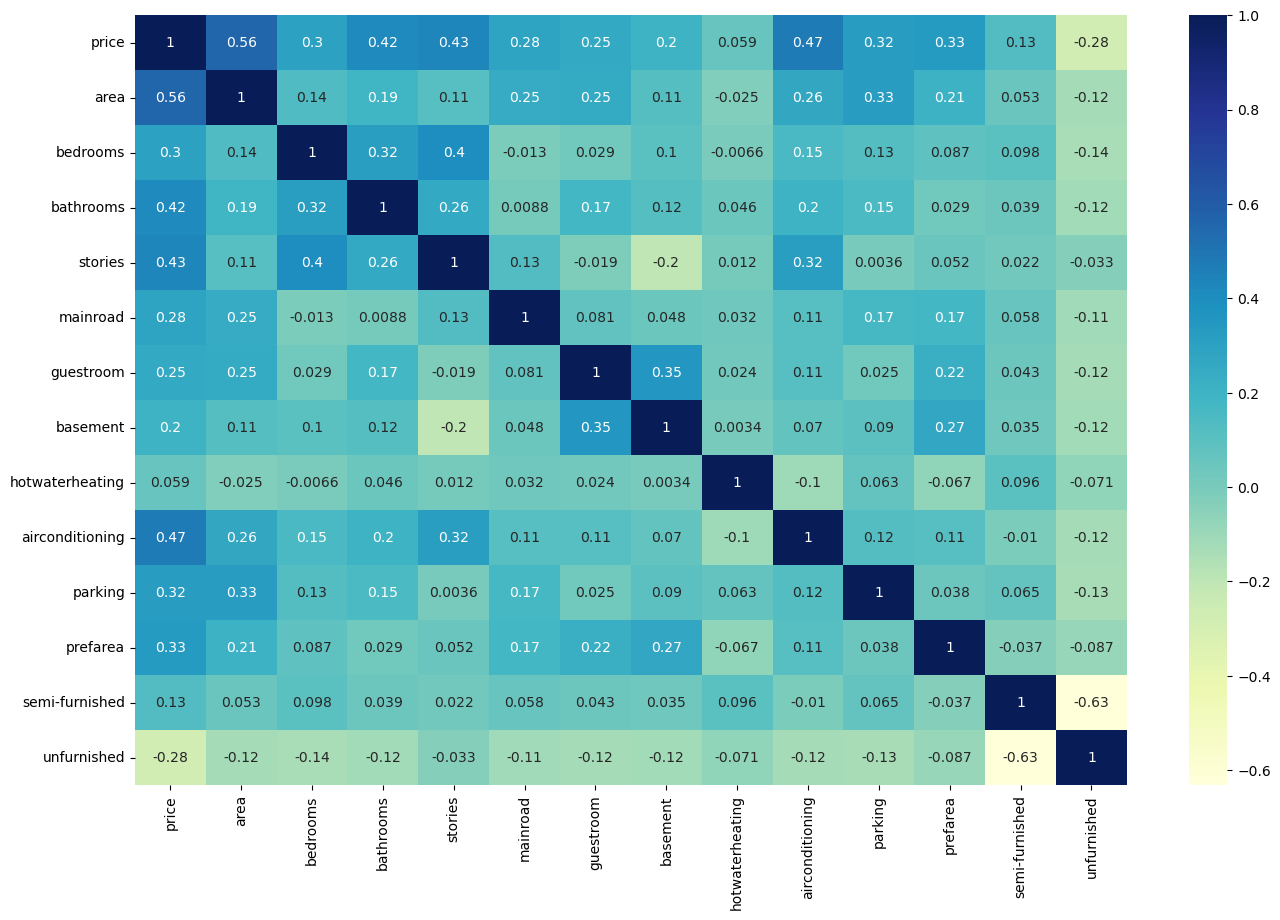

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('price')
X_train = df_train

KeyError: 'price'

## Model Building

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE

Recursive feature elimination

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning and data mining to select a subset of important features from a larger set of features in a dataset. It works by recursively fitting a machine learning model to the dataset multiple times, each time removing the least important features based on a ranking or importance measure, until a desired number of features or a predefined stopping criterion is reached.

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
rfe = RFE(lm) #RFE(lm,6)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.31e-69
Time:                        11:53:58   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     